<a href="https://colab.research.google.com/github/jyotz02/Learning/blob/master/Predict_Num_Upvote/Predict%20num%20of%20upvotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT:

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

### HYPOTHESIS:

1. Based on views
2. Based on likes.
3. Number od ans.
4. Upvote/Downvote
5. How many shared it
6. reputation of author

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train=pd.read_csv('/content/drive/My Drive/dse/predict_num/train_NIR5Yl1.csv')
test=pd.read_csv('/content/drive/My Drive/dse/predict_num/test_8i3B3FC.csv')

In [0]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
print(train.shape)
print(test.shape)

(330045, 7)
(141448, 6)


In [0]:
train.groupby("Username")["Views"].nunique()

Username
0         1
1         1
2         1
3         1
5         1
6         1
9         1
10        1
11        1
12        1
13        1
14        1
17        1
18        1
21        1
22        1
26        1
28        1
29        1
30        1
31        1
32        1
36        1
37        1
38        1
39        1
41        1
43        1
46        1
47        1
         ..
175701    1
175702    1
175703    1
175704    2
175705    1
175706    1
175707    1
175708    1
175710    1
175711    1
175712    1
175713    1
175714    2
175716    1
175719    1
175720    1
175721    7
175723    1
175724    1
175725    1
175726    2
175728    1
175729    4
175730    1
175732    1
175733    1
175734    1
175735    1
175736    1
175738    2
Name: Views, Length: 141802, dtype: int64

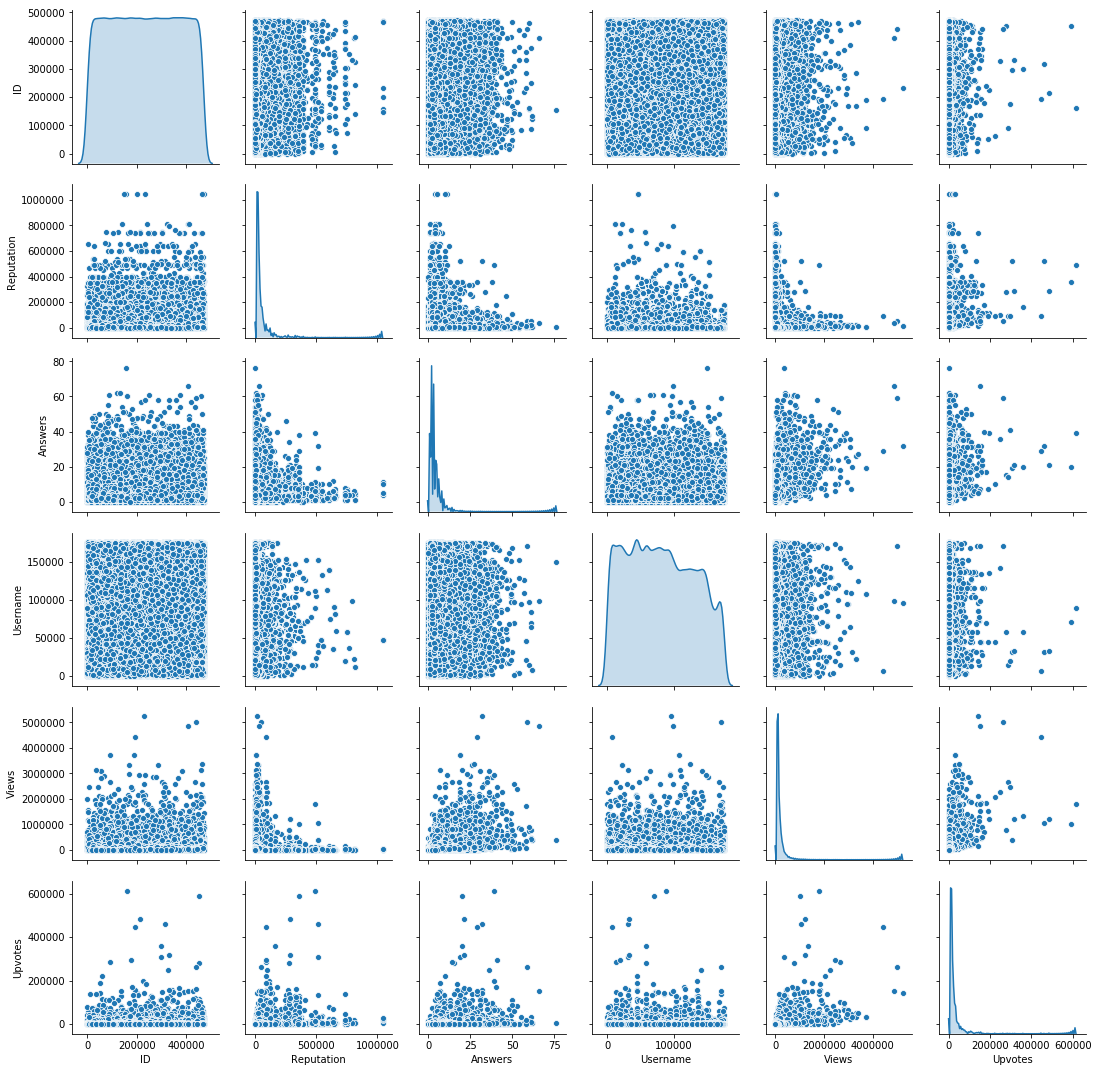

In [0]:
sns.pairplot(train,diag_kind='kde')

### Univariate Analysis

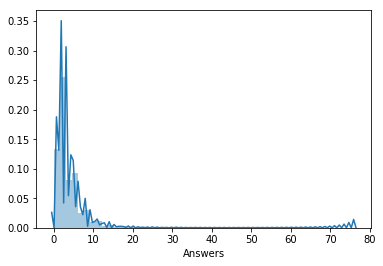

In [0]:
sns.distplot(train.Answers)

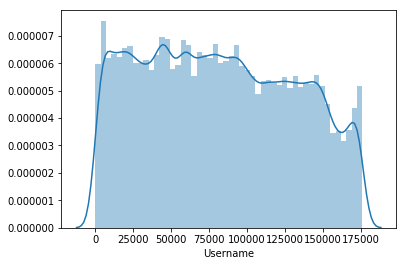

In [0]:
sns.distplot(train.Username)

In [0]:
#tag,upvotes

train.groupby("Tag")["Upvotes"].nunique().sort_values(ascending=False)

Tag
j    4285
c    3495
p    2758
a    2105
h    1765
s    1611
i    1432
o     946
r     715
x     698
Name: Upvotes, dtype: int64

In [0]:
train.Reputation.unique()

array([ 3942., 26046.,  1358., ..., 39952., 14347., 65763.])

In [0]:
train.groupby("Reputation")["Answers"].value_counts().sort_values(ascending=False)

Reputation  Answers
0.0         2.0        1184
            3.0        1059
            4.0         847
            1.0         843
            5.0         693
            6.0         487
1.0         1.0         402
6.0         1.0         370
11.0        1.0         367
8.0         1.0         358
16.0        1.0         346
13.0        1.0         337
0.0         7.0         337
1.0         2.0         333
18.0        1.0         315
23.0        1.0         310
21.0        2.0         308
16.0        2.0         306
0.0         8.0         296
6.0         2.0         287
11.0        2.0         285
28.0        1.0         277
21.0        1.0         274
8.0         2.0         254
33.0        1.0         243
26.0        1.0         241
23.0        2.0         234
28.0        2.0         233
13.0        2.0         230
18.0        2.0         228
                       ... 
7305.0      2.0           1
7321.0      7.0           1
7313.0      5.0           1
7321.0      5.0           1


In [0]:
train.Answers.value_counts(normalize=True)

2.0     0.216786
1.0     0.197422
3.0     0.170677
4.0     0.122665
5.0     0.084446
6.0     0.056950
7.0     0.038328
8.0     0.027081
9.0     0.018925
10.0    0.013650
11.0    0.009693
12.0    0.007484
0.0     0.006308
13.0    0.005817
14.0    0.004524
15.0    0.003481
16.0    0.002660
17.0    0.002154
18.0    0.001694
19.0    0.001412
20.0    0.001230
21.0    0.000891
22.0    0.000821
23.0    0.000682
24.0    0.000633
25.0    0.000497
28.0    0.000382
26.0    0.000376
30.0    0.000303
27.0    0.000294
          ...   
34.0    0.000151
33.0    0.000127
35.0    0.000112
36.0    0.000109
39.0    0.000073
37.0    0.000064
38.0    0.000048
41.0    0.000045
40.0    0.000045
43.0    0.000036
47.0    0.000024
49.0    0.000024
42.0    0.000021
46.0    0.000015
51.0    0.000015
54.0    0.000012
45.0    0.000012
48.0    0.000012
58.0    0.000012
50.0    0.000012
44.0    0.000012
61.0    0.000009
60.0    0.000009
62.0    0.000006
57.0    0.000006
76.0    0.000003
55.0    0.000003
59.0    0.0000

### Obsv: 
Answer has got max 76 count and min 0 count for answer, also 2 votes is having max % ie. 2%

In [0]:
train.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

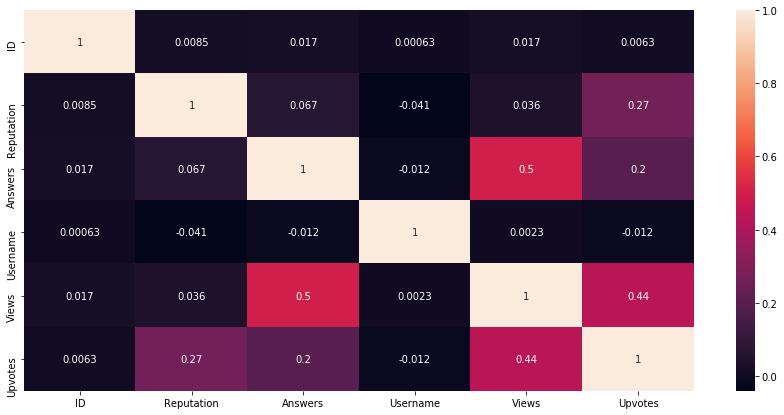

In [0]:
plt.figure(figsize=[15,7])
sns.heatmap(train.corr(), annot=True)

In [0]:
train.Views.describe()

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [0]:
train.Views.astype("int")

0           7855
1          55801
2           8067
3          27064
4          13986
5           5577
6          17184
7            312
8          53738
9            227
10        141836
11          8086
12         16102
13           266
14          5579
15         29191
16          5622
17          3949
18          1133
19         13096
20         20035
21          1881
22          7169
23         55594
24         16634
25          6152
26         38443
27          2052
28         11389
29          1323
           ...  
330015     16883
330016      3058
330017     22746
330018     26688
330019      4151
330020       892
330021      1537
330022      3486
330023      6004
330024       268
330025      9531
330026     12189
330027      4274
330028      3644
330029     18069
330030     11537
330031      4010
330032     61238
330033      2372
330034     63005
330035     49396
330036     85644
330037     52493
330038     10486
330039      5335
330040      1063
330041     23319
330042      24

In [0]:
train.Tag.unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [0]:
def tag_cat(i):
  if(i=='a'):
    return(1)
  elif(i=='c'):
    return(2)
  elif(i=='r'):
    return(3)
  elif(i=='j'):
    return(4)
  elif(i=='p'):
    return(5)
  elif(i=='s'):
    return(6)
  elif(i=='h'):
    return(7)
  elif(i=='o'):
    return(8)
  elif(i=='i'):
    return(9)
  else:
    return(10)
  

In [0]:
train.Tag=train.Tag.apply(tag_cat)

In [0]:
test.Tag=test.Tag.apply(tag_cat)

In [0]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,1,3942.0,2.0,155623,7855.0,42.0
1,327662,1,26046.0,12.0,21781,55801.0,1175.0
2,468453,2,1358.0,4.0,56177,8067.0,60.0
3,96996,1,264.0,3.0,168793,27064.0,9.0
4,131465,2,4271.0,4.0,112223,13986.0,83.0


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null int64
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(3)
memory usage: 17.6 MB


In [0]:
new_train=train.drop(["ID","Username"],axis=1)

In [0]:
new_test=test.drop(["ID","Username"],axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
dummytrain=pd.get_dummies(new_train)

In [0]:
dummytest=pd.get_dummies(new_test)

In [0]:
print(dummytrain.shape)
print(dummytest.shape)

(330045, 14)
(141448, 13)


In [0]:
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns)

In [0]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [0]:
X=scaled_train.drop("Upvotes",axis=1)
y=scaled_train["Upvotes"]

In [0]:
logr=lr.fit(X,y).predict(scaled_test)

In [0]:
logr # with LR 3545.0563087677333.

array([ 3.04746766e+08,  9.16373273e+08, -1.82316974e+09, ...,
       -6.25835779e+08, -1.24196245e+09,  3.04746766e+08])

In [0]:
#Inverse transform
sm=StandardScaler()
votes=sm.fit_transform(pd.DataFrame(train.Upvotes))
org_vote=sm.inverse_transform(logr)

In [0]:
org_vote

array([ 305.0676219 ,  216.24656631,  120.66350249, ...,  605.21880787,
       -214.68394293, -228.78769035])

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [0]:
rf_mdel=rf.fit(X,y).predict(scaled_test)  # rmse---1364

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
ada=AdaBoostRegressor(base_estimator=rf)
gb=GradientBoostingRegressor()

In [0]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
xg_reg = xgb.XGBRegressor()

In [0]:
xg_model=xg_reg.fit(X,y).predict(scaled_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[07:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
xg_model # rmse-- 1212.2563981990427.

array([-0.03982127,  0.01126701, -0.09100699, ..., -0.04476357,
       -0.10536242, -0.09676874], dtype=float32)

In [0]:
gb_model=gb.fit(X,y).predict(scaled_test) #rmse---- 1149

In [0]:
#Inverse transform
sm=StandardScaler()
votes=sm.fit_transform(pd.DataFrame(train.Upvotes))
org_vote=sm.inverse_transform(xg_model)

In [0]:
solution = pd.DataFrame({"ID":test.ID, "Upvotes":org_vote})

In [0]:
from google.colab import files
solution.to_csv("predictNum_XG.csv", index=False)
files.download("predictNum_XG.csv")

In [0]:
pd.DataFrame(rf.feature_importances_,index=scaled_train.drop("Upvotes",axis=1).columns,columns=["Features"]).sort_values("Features",ascending=False)

,Features
Reputation,0.614784
Views,0.342701
Answers,0.021936
Tag_p,0.009184
Tag_j,0.003920
Tag_h,0.003153
Tag_c,0.002699
Tag_a,0.001067
Tag_s,0.000343
Tag_x,0.000080


In [0]:
new_train.describe()

,Reputation,Answers,Views,Upvotes
count,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,5.231058e+06,615278.000000


In [0]:
train[train.Reputation>5118]["Reputation"].sort_values(ascending=False).unique()

array([1042428.,  813374.,  813364., ...,    5121.,    5120.,    5119.])

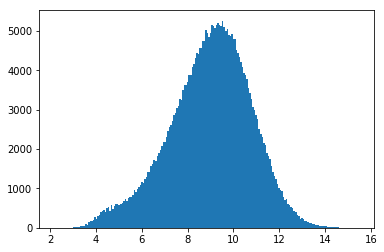

In [0]:
plt.hist(np.log(train["Views"]),bins=200)
plt.show()

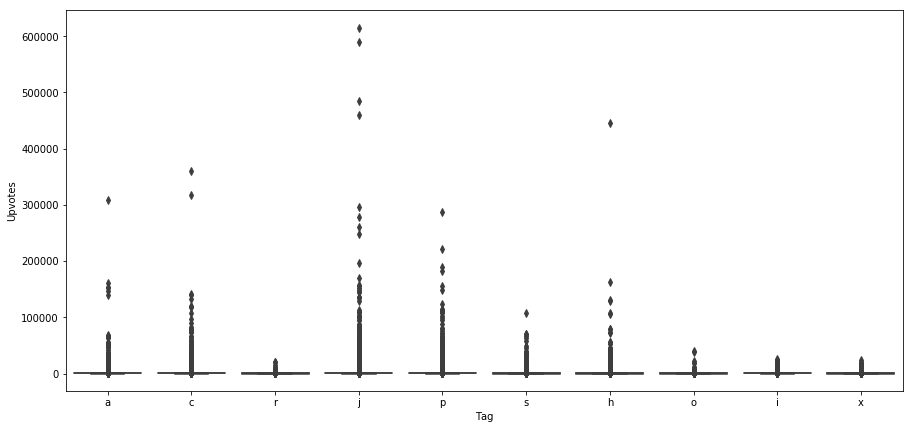

In [0]:
plt.figure(figsize=[15,7])
sns.boxplot(x="Tag",y="Upvotes",data=train)